In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn

%matplotlib inline 


In [3]:
os.listdir('.')

['.ipynb_checkpoints',
 '01_NumbersStringList.pdf',
 '01_NumbersStringLists.ipynb',
 '02_BooleansTuplesDictionaries.ipynb',
 '02_BooleansTuplesDictionaries.pdf',
 '03_ControlFlow.ipynb',
 '03_ControlFlow.pdf',
 '03a_MoreExercisesControlFlow.ipynb',
 '04_ReadCSV.ipynb',
 '05_TimeSeries.ipynb',
 '06_Matplotlib.ipynb',
 'XRFohneJulia.ipynb',
 'plots',
 'selbsthilfe_tutorial_1.ipynb']

In [4]:
os.listdir('../data')

['.ipynb_checkpoints', 'Hintereisferner.csv', 'Oetztal.dat', 'XRF_example.csv']

In [73]:
p = '../data/XRF_example.csv'
df = pd.read_csv(p, sep = ';')

In [74]:
df.head()

,depth,scanner,core,position in mm,sample surface,validity,E-gain,E-offset,F-slope,F-offset,...,We1,We2,Wi1,Fe2,Wi2,Wi3,We3,Mo inc,Mo coh,Dt
0,2.2284,26,3A,26,6.52,1,0.019271,-0.013141,0.008176,0.097921,...,625,520,221,0,88,314,183,33023,7568,0.252
1,4.4568,28,3A,28,6.52,1,0.019271,-0.013141,0.008176,0.097921,...,565,539,218,17,336,274,182,34547,7730,0.264
2,6.6852,30,3A,30,6.50,1,0.019271,-0.013141,0.008176,0.097921,...,513,472,302,7,51,324,167,33385,7397,0.268
3,8.9136,32,3A,32,6.47,1,0.019271,-0.013141,0.008176,0.097921,...,621,600,218,29,48,373,134,32616,7518,0.279
4,11.1420,34,3A,34,6.45,1,0.019271,-0.013141,0.008174,0.097921,...,606,619,204,47,361,380,382,32425,7614,0.278


In [75]:
for col in df.columns: 
    print(col)

depth
scanner
core
position in mm
sample surface
validity
E-gain
E-offset
F-slope
F-offset
cps
MSE
Al
Si
P
S
Cl
Ar
K
Ca
Ti
V
Cr
Mn
Fe
Co
Ni
Cu
Zn
Ga
Ge
Se
Br
Rb
Sr
Y
Zr
Rh
Pd
Ag
Cd
In
Sn
Sb
Ba
Ce
Pr
Nd
Sm
Eu
Gd
Tb
Pb
Fe a+a
Fe-edge
We1
We2
Wi1
Fe2
Wi2
Wi3
We3
Mo inc
Mo coh
Dt


In [76]:
# alternativ
list(df)

['depth',
 'scanner',
 'core',
 'position in mm',
 'sample surface',
 'validity',
 'E-gain',
 'E-offset',
 'F-slope',
 'F-offset',
 'cps',
 'MSE',
 'Al',
 'Si',
 'P',
 'S',
 'Cl',
 'Ar',
 'K',
 'Ca',
 'Ti',
 'V',
 'Cr',
 'Mn',
 'Fe',
 'Co',
 'Ni',
 'Cu',
 'Zn',
 'Ga',
 'Ge',
 'Se',
 'Br',
 'Rb',
 'Sr',
 'Y',
 'Zr',
 'Rh',
 'Pd',
 'Ag',
 'Cd',
 'In',
 'Sn',
 'Sb',
 'Ba',
 'Ce',
 'Pr',
 'Nd',
 'Sm',
 'Eu',
 'Gd',
 'Tb',
 'Pb',
 'Fe a+a',
 'Fe-edge',
 'We1',
 'We2',
 'Wi1',
 'Fe2',
 'Wi2',
 'Wi3',
 'We3',
 'Mo inc',
 'Mo coh',
 'Dt']

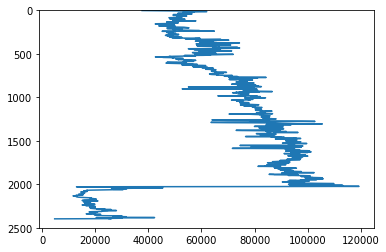

In [77]:
plt.plot(df.Ca, df.depth)
plt.ylim(2500,0);

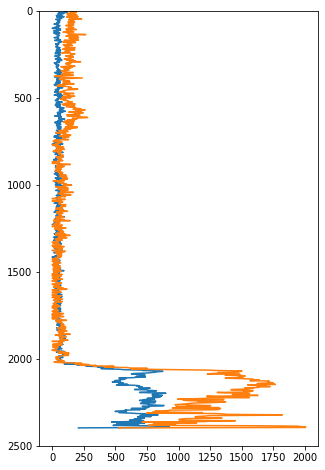

In [78]:
fig = plt.figure(figsize=(5,8))
ax = plt.axes(ylim = [2500, 0]) 
plt.plot(df.Si, df.depth)
plt.plot(df.Ti, df.depth)

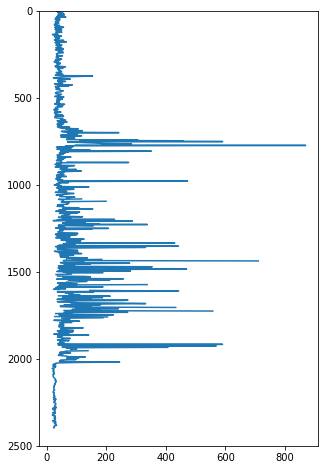

In [79]:
fig = plt.figure(figsize=(5,8))
ax = plt.axes(ylim = [2500, 0])
plt.plot(df.Fe/df.Ti, df.depth)

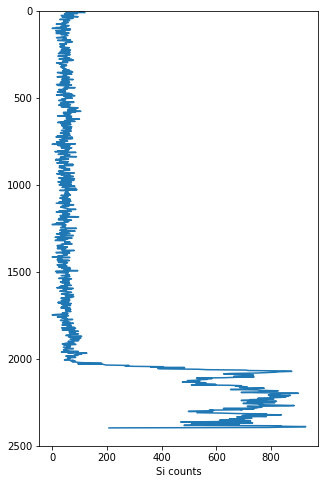

In [80]:
var = df.Si

fig = plt.figure(figsize=(5,8))
ax = plt.axes(ylim = [2500, 0])
plt.xlabel(var.name + " counts")

plt.plot(var, df.depth)

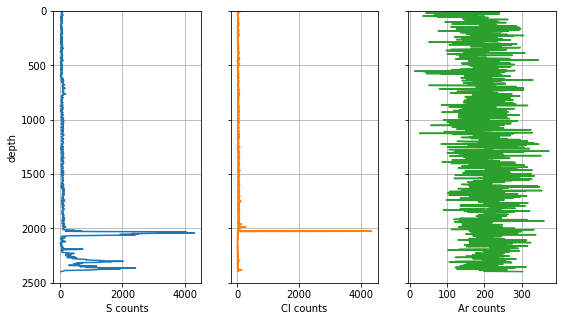

In [81]:
fig, axes = plt.subplots(1, 3, figsize = (9,5), sharey = True) # 3 Spalten, 1 Zeile # sharey = nur eine y-Achse
colors=['C0','C1','C2']

for i, var in enumerate(range(15, 18)): # macht einen index (i), d.h. 0,1,2 (um auf subplots zuzugreifen); und den Wert (15,16,17)
    element = df.columns[var]
    #print(df[element])
    axes[i].set_xlabel(df[element].name + " counts")
    axes[i].plot(df[element], df.depth,color=colors[i])
    axes[i].set_ylim(2500, 0)
    axes[i].grid()
    
axes[0].set_ylabel(df["depth"].name);

# Plotting a heatmap with normalized XRF values

we want to select columns 12 to -13. 

In [82]:
df_sel = df.iloc[:,12:-13]

In [83]:
df_sel.head()

,Al,Si,P,S,Cl,Ar,K,Ca,Ti,V,...,Sn,Sb,Ba,Ce,Pr,Nd,Sm,Eu,Gd,Tb
0,24,100,13,64,18,275,378,37664,164,26,...,0,226,17,11,0,15,0,44,0,27
1,0,110,4,71,107,97,446,45037,148,0,...,41,229,35,23,32,7,0,0,0,97
2,0,106,0,77,10,142,474,48778,192,15,...,0,327,0,27,13,0,0,106,0,79
3,23,120,0,68,0,128,432,57206,160,20,...,19,358,22,0,17,0,0,29,0,87
4,28,50,0,82,36,193,392,61938,139,35,...,38,404,7,9,22,24,0,0,0,124


In [84]:
means = df_sel.mean(axis=0)

In [85]:
means

Al       39.887726
Si      139.532826
P         0.928639
S       157.242626
Cl       33.948620
Ar      200.973359
K       537.176023
Ca    67091.321598
Ti      255.425309
V        27.261656
Cr       34.883920
Mn      349.046622
Fe     8361.221694
Co       41.636537
Ni      142.654615
Cu       71.995243
Zn      142.699334
Ga       45.606089
Ge       49.128449
Se       28.841104
Br       59.000000
Rb      153.450999
Sr      671.776403
Y       124.121789
Zr      118.191246
Rh       14.795433
Pd       19.530923
Ag       26.497621
Cd       45.673644
In       92.447193
Sn       34.040913
Sb      341.905804
Ba      111.441484
Ce        6.025690
Pr        7.345385
Nd       13.010466
Sm        3.548049
Eu       14.105614
Gd        6.910561
Tb       90.365366
dtype: float64

In [86]:
SDs = df_sel.std(axis=0)

In [87]:
SDs['Ca']

24920.672323639068

In [88]:
df_sel_norm = (df_sel -means) / SDs

In [89]:
df_sel_norm

,Al,Si,P,S,Cl,Ar,K,Ca,Ti,V,...,Sn,Sb,Ba,Ce,Pr,Nd,Sm,Eu,Gd,Tb
0,-0.768735,-0.175959,3.036730,-0.230946,-0.118096,1.318210,-0.219469,-1.180840,-0.208115,-0.056719,...,-1.391415,-0.939999,-1.449153,0.491201,-0.751703,0.155875,-0.358487,1.328002,-0.353683,-0.489159
1,-1.929987,-0.131449,0.772646,-0.213609,0.540929,-1.851479,-0.125712,-0.884981,-0.244537,-1.225578,...,0.284451,-0.915669,-1.172953,1.676172,2.523073,-0.470904,-0.358487,-0.626615,-0.353683,0.051217
2,-1.929987,-0.149253,-0.233613,-0.198748,-0.177334,-1.050153,-0.087106,-0.734865,-0.144378,-0.551237,...,-1.391415,-0.120886,-1.710008,2.071163,0.578675,-1.019336,-0.358487,4.082234,-0.353683,-0.087737
3,-0.817121,-0.086940,-0.233613,-0.221039,-0.251382,-1.299454,-0.145015,-0.396672,-0.217221,-0.326456,...,-0.614794,0.130524,-1.372430,-0.595022,0.988022,-1.019336,-0.358487,0.661655,-0.353683,-0.025979
4,-0.575193,-0.398507,-0.233613,-0.186363,0.015190,-0.141984,-0.200166,-0.206789,-0.265024,0.347886,...,0.161827,0.503585,-1.602597,0.293706,1.499706,0.861001,-0.358487,-0.626615,-0.353683,0.259648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,3.295645,3.033183,-0.233613,-0.057568,-0.206953,1.015487,3.657662,-1.484202,3.852879,3.314990,...,-0.982667,-1.069759,-1.172953,2.861143,-0.137682,0.469264,3.683021,1.905502,3.228920,4.412825
1047,3.634343,3.504985,-0.233613,-0.102151,0.059619,-0.052947,3.828631,-1.480270,3.893853,2.730561,...,0.897573,-1.751001,0.177359,2.367405,2.625410,0.547612,0.853965,3.504734,5.583203,4.003683
1048,2.956946,3.224575,2.030470,-0.161595,-0.162525,0.499077,4.427022,-1.692784,3.984906,1.291965,...,0.693199,-1.491480,2.693849,0.984939,1.704379,3.054727,3.177832,2.571848,5.071402,3.810692
1049,2.182779,2.890753,2.030470,-0.183887,-0.081072,0.053896,4.080948,-1.645474,3.971248,3.270034,...,-1.391415,-1.532030,2.617127,0.787444,-0.240019,0.469264,4.592360,-0.626615,2.512400,2.421153


In [90]:
df_sel_norm.min()

Al   -1.929987
Si   -0.621055
P    -0.233613
S    -0.389464
Cl   -0.251382
Ar   -3.347287
K    -0.706178
Ca   -2.501831
Ti   -0.581435
V    -1.225578
Cr   -1.209484
Mn   -0.781596
Fe   -0.630511
Co   -0.853065
Ni   -2.951111
Cu   -2.130166
Zn   -1.665513
Ga   -0.648703
Ge   -1.270595
Se   -0.923652
Br   -1.489691
Rb   -0.610202
Sr   -1.255175
Y    -2.208487
Zr   -0.612715
Rh   -1.162073
Pd   -1.100087
Ag   -0.823194
Cd   -1.310795
In   -1.844011
Sn   -1.391415
Sb   -2.586333
Ba   -1.710008
Ce   -0.595022
Pr   -0.751703
Nd   -1.019336
Sm   -0.358487
Eu   -0.626615
Gd   -0.353683
Tb   -0.697590
dtype: float64

In [91]:
df_sel_norm.loc[:,"depth"] = df.depth.round(1)

In [92]:
df_sel_norm.head()

,Al,Si,P,S,Cl,Ar,K,Ca,Ti,V,...,Sb,Ba,Ce,Pr,Nd,Sm,Eu,Gd,Tb,depth
0,-0.768735,-0.175959,3.036730,-0.230946,-0.118096,1.318210,-0.219469,-1.180840,-0.208115,-0.056719,...,-0.939999,-1.449153,0.491201,-0.751703,0.155875,-0.358487,1.328002,-0.353683,-0.489159,2.2
1,-1.929987,-0.131449,0.772646,-0.213609,0.540929,-1.851479,-0.125712,-0.884981,-0.244537,-1.225578,...,-0.915669,-1.172953,1.676172,2.523073,-0.470904,-0.358487,-0.626615,-0.353683,0.051217,4.5
2,-1.929987,-0.149253,-0.233613,-0.198748,-0.177334,-1.050153,-0.087106,-0.734865,-0.144378,-0.551237,...,-0.120886,-1.710008,2.071163,0.578675,-1.019336,-0.358487,4.082234,-0.353683,-0.087737,6.7
3,-0.817121,-0.086940,-0.233613,-0.221039,-0.251382,-1.299454,-0.145015,-0.396672,-0.217221,-0.326456,...,0.130524,-1.372430,-0.595022,0.988022,-1.019336,-0.358487,0.661655,-0.353683,-0.025979,8.9
4,-0.575193,-0.398507,-0.233613,-0.186363,0.015190,-0.141984,-0.200166,-0.206789,-0.265024,0.347886,...,0.503585,-1.602597,0.293706,1.499706,0.861001,-0.358487,-0.626615,-0.353683,0.259648,11.1


In [93]:
df_sel_norm = df_sel_norm.set_index("depth")

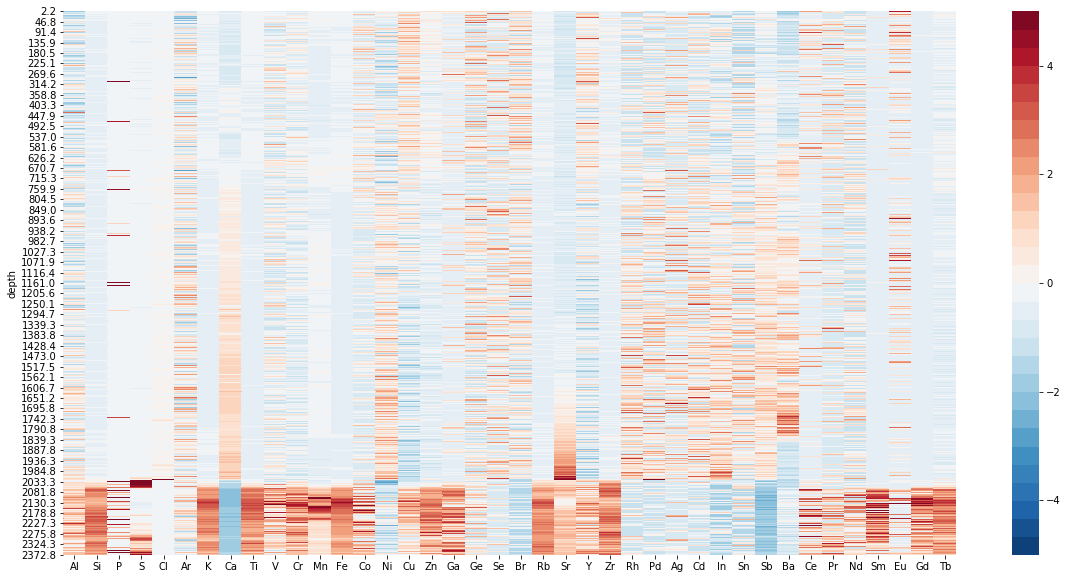

In [100]:
plt.figure(figsize= ((20,10)))
seaborn.heatmap(df_sel_norm, vmin = -5, vmax = 5, cmap = seaborn.color_palette("RdBu_r", 30))